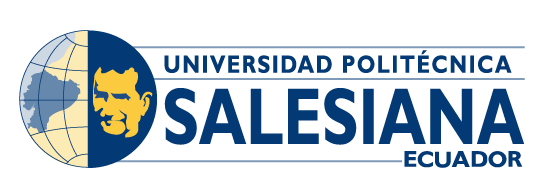

## Roberto Pacho
#### Datos FIFA:  https://data.world/raghav333/fifa-players

In [5]:
import altair as alt
import pandas as pd
import plotly.express as px
import plotly
plotly.offline.init_notebook_mode(connected=True)

In [7]:
df = pd.read_csv('/home/RobertoPacho/Documentos/Simulacion/Tareas/Primer Interciclo/Fifa/fifa.csv')
df.head()

,id,name,full_name,birth_date,age,height_cm,weight_kgs,positions,nationality,overall_rating,...,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB
0,158023,L. Messi,Lionel Andrés Messi Cuccittini,1987-06-24,31,170.18,72.1,"CF,RW,ST",Argentina,94,...,64+2,61+2,61+2,61+2,64+2,59+2,48+2,48+2,48+2,59+2
1,190460,C. Eriksen,Christian Dannemann Eriksen,1992-02-14,27,154.94,76.2,"CAM,RM,CM",Denmark,88,...,71+3,71+3,71+3,71+3,71+3,66+3,57+3,57+3,57+3,66+3
2,195864,P. Pogba,Paul Pogba,1993-03-15,25,190.50,83.9,"CM,CAM",France,88,...,76+3,77+3,77+3,77+3,76+3,74+3,72+3,72+3,72+3,74+3
3,198219,L. Insigne,Lorenzo Insigne,1991-06-04,27,162.56,59.0,"LW,ST",Italy,88,...,63+3,58+3,58+3,58+3,63+3,58+3,44+3,44+3,44+3,58+3
4,201024,K. Koulibaly,Kalidou Koulibaly,1991-06-20,27,187.96,88.9,CB,Senegal,88,...,73+3,77+3,77+3,77+3,73+3,76+3,85+3,85+3,85+3,76+3


- Análisis de datos

1. Con los datos de la FIFA, organizar a los jugadores de acuerdo al peso en las siguientes escalas y generar un cuadro tipo PIE.


* **Debajo de 125 lbs**
* **125-150**
* **150-175**
* **175 o superior**

In [8]:
#primero convertimos la medida de kgs a libras
df['weight_lbs'] = df['weight_kgs']*2.20462
df[['weight_lbs','weight_kgs']].head()

,weight_lbs,weight_kgs
0,158.953102,72.1
1,167.992044,76.2
2,184.967618,83.9
3,130.072580,59.0
4,195.990718,88.9


In [9]:
dict_weight = {'weight_lbs':['<125','>=125 and <150','>=150 and <175','>=175'],
               'values':[df.query('weight_lbs <125').count()[0]/len(df),
                         df.query('weight_lbs >=125 and weight_lbs < 150 ').count()[0]/len(df),
                        df.query('weight_lbs >=150 and weight_lbs < 175 ').count()[0]/len(df)
                         ,df.query('weight_lbs >=175').count()[0]/len(df)]}
df_weight=pd.DataFrame(dict_weight)
df_weight

,weight_lbs,values
0,<125,0.002005
1,>=125 and <150,0.163752
2,>=150 and <175,0.558928
3,>=175,0.275315


In [10]:
fig = px.pie(df_weight, values="values",
             names="weight_lbs", 
             color_discrete_sequence=px.colors.sequential.Rainbow,width=500,height=500)
fig.update_layout(title_text='Peso Jugadores de fútbol FIFA', title_x=0.5)

2. Generar un gráfico de barras (histograma) de acuerdo a su habilidad (overall) en base a los siguientes segmentos contando el número de jugadores:


* **40**
* **50**
* **60**
* **70**
* **80**
* **90**
* **100**

In [11]:
df_overall = pd.DataFrame(df.groupby(['overall_rating'])['overall_rating'].count())
df_overall.columns = ['count']
df_overall.reset_index(inplace=True)
df_overall.head()

,overall_rating,count
0,47,21
1,48,33
2,49,45
3,50,98
4,51,120


In [12]:
alt.Chart(df_overall.melt('overall_rating')).mark_bar().encode(
    x=alt.X('overall_rating',bin=alt.Bin(maxbins=5),title='Overall'),
    y=alt.Y('value',title='count'),
    color=alt.Color('variable',scale=alt.Scale(domain=['count'],range=['magenta']))
).properties(title='Overall rating').interactive()

alt.Chart(...)

3. Investigar como pasar parametros y generar reportes utilizando NoteBook.
una de las formas es utilizar papermill

Papermill es una herramienta que nos permite parametrizar y ejecutar cuadernos jupyter. Esta herramienta transforma tu jupyter notebook en una herramienta de data workflow, va ejecutando cada celda secuencialmente sin la necesidad de tener jupyterLab (o notebook) abierto. 

**permite:**

- Parametrizar cuadernos
- Ejecutar y recolectar metricas a traves de cuadernos
- Resumir lo recolectado de tus cuadernos
- Usa los cuadernos como llamar funciones**

**Como usar**
#### 1- enla barra de herramientas buscamos View
#### 2- precionams y elegimos Cell Toolbar
#### 3- no aparecera mas opciones y escojemos Tags

In [1]:
a=5
b=10

In [2]:
#Parametros
a=20
b=50

In [3]:
div=a/b
suma=a+b
resta=b-a

In [4]:
print(suma)
print(div)
print(resta)

70
0.4
30
